<a href="https://colab.research.google.com/github/nikhilgunti/Deep-Learning/blob/master/CIFAR10_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import ZeroPadding2D
from tensorflow.python.keras.layers import Activation, Dropout
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import adam
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

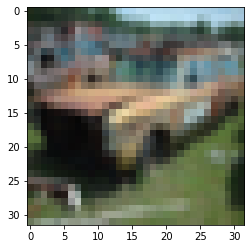

In [4]:
plt.imshow(X_train[97])

In [5]:
len(Y_train)

50000

In [0]:
#Preprocessing the image
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [0]:
#Normalizing the values
X_train =X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255

In [9]:
Y_train[1]

array([9], dtype=uint8)

In [0]:
Y_train = np_utils.to_categorical(Y_train, num_classes=10)
Y_test = np_utils.to_categorical(Y_test, num_classes=10)

In [11]:
np.unique(Y_train, return_counts=True)

(array([0., 1.], dtype=float32), array([450000,  50000]))

In [12]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)))
model.output_shape

(None, 30, 30, 64)

In [13]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 256)        

In [0]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [16]:
result = model.fit(X_train, Y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/5
1563/1563 [==============================] - 31s 20ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 31s 20ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 31s 20ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 31s 20ms/step - loss: 2.3028 - accuracy: 0.0951 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 31s 20ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000


In [20]:
print(result.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


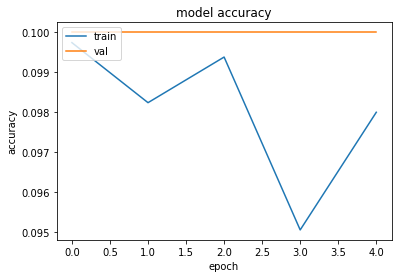

In [23]:
# summarize history for accuracy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()